In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [22]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=1000, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=10)

<Axes: xlabel='0', ylabel='1'>

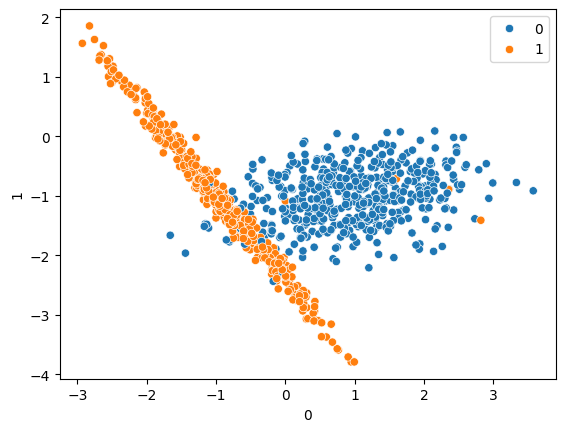

In [23]:
sns.scatterplot(x=pd.DataFrame(X)[0], y=pd.DataFrame(X)[1], hue=y)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       110
           1       0.97      0.99      0.98        90

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



In [27]:
from sklearn.model_selection import GridSearchCV
params = {
    'C': [100, 10, 1, 0.1, 0.01],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'degree': [1, 2, 3, 4, 5],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
}
grid_model = GridSearchCV(estimator=svc, param_grid=params, refit=True, cv=5, verbose=3)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[CV 1/5] END C=100, degree=1, gamma=1, kernel=linear;, score=0.950 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=1, kernel=linear;, score=0.944 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=1, kernel=linear;, score=0.931 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=1, kernel=linear;, score=0.956 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=1, kernel=poly;, score=0.950 total time=   0.0s
[CV 2/5] END C=100, degree=1, gamma=1, kernel=poly;, score=0.944 total time=   0.0s
[CV 3/5] END C=100, degree=1, gamma=1, kernel=poly;, score=0.969 total time=   0.0s
[CV 4/5] END C=100, degree=1, gamma=1, kernel=poly;, score=0.931 total time=   0.0s
[CV 5/5] END C=100, degree=1, gamma=1, kernel=poly;, score=0.956 total time=   0.0s
[CV 1/5] END C=100, degree=1, gamma=1, kernel=rbf;, score=0.956 total time=   0.0s
[CV

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",SVC()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [100, 10, ...], 'degree': [1, 2, ...], 'gamma': [1, 0.1, ...], 'kernel': ['linear', 'poly', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is

In [28]:
grid_model.best_params_

{'C': 100, 'degree': 1, 'gamma': 1, 'kernel': 'rbf'}

In [29]:
grid_model.best_score_

np.float64(0.9712500000000001)

In [30]:
y_pred1 = grid_model.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       110
           1       0.99      0.99      0.99        90

    accuracy                           0.99       200
   macro avg       0.99      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200

